# Exam: Loan approval analysis 貸款審批分析實作-ANSWER
## 資料來源 參考文件
### https://www.kaggle.com/code/bibekrai44/loan-approval-analysis
### https://ithelp.ithome.com.tw/articles/10240494
### https://www.796t.com/content/1542164169.html
### https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87
### https://blog.csdn.net/CherDW/article/details/55813071


# EXAM1: 請讀取所給之資料集依照下列步驟做出最佳之貸款審批預測模型
## 貸款資料集欄位，csv格式的資料。
#### 客戶ID：唯一的識別碼
#### 年齡：客戶年齡
#### 性別：客戶性別，如男，女
#### 婚姻狀況：客戶的婚姻狀況，如未婚、已婚、離婚等
#### 教育程度：客戶的教育程度，如高中、大學、研究所等
#### 職業：客戶的職業，如受雇職員、自營老闆、教師，公務員，軍人，律師，醫生，工程師等
#### 年收入：客戶的年收入，以萬元為單位
#### 貸款金額：客戶申請的貸款金額，以萬元為單位
#### 還款期限：客戶選擇的還款期限，以年為單位
#### 信用狀態：客戶的信用分數
#### 貸款批准：客戶的貸款是否批准,如 是，否

## Step1: Importing necessary libraries
##             Importing libraries required for ML

In [271]:
import sklearn
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [272]:
from sklearn.model_selection import train_test_split
#sklearn之LabelEncoder將Label標準化
#LabelEncoder可以將標籤分配一個0—n_classes-1之間的編碼
#將各種標籤分配一個可數的連續編號
from sklearn.preprocessing import LabelEncoder


## Step2: Read dataset

In [273]:
df=pd.read_csv('loandata_setU.csv')
df.head()

,客戶ID,年齡,性別,婚姻狀況,教育程度,職業,年收入,貸款金額,還款期限,信用狀態,貸款批准
0,1001,35,男,已婚,研究所,醫生,800.0,100.0,1.0,90.0,是
1,1002,28,女,未婚,大學,受雇職員,50.0,80.0,2.0,75.0,否
2,1003,42,男,已婚,高中,自營老闆,1200.0,200.0,5.0,80.0,是
3,1004,30,男,未婚,大學,工程師,60.0,180.0,3.0,85.0,否
4,1005,50,女,已婚,研究所,教師,100.0,100.0,5.0,95.0,是


In [274]:
print(df.iloc[:50])

        客戶ID  年齡 性別 婚姻狀況 教育程度    職業     年收入   貸款金額  還款期限  信用狀態 貸款批准
0       1001  35  男   已婚  研究所    醫生   800.0  100.0   1.0  90.0    是
1       1002  28  女   未婚   大學  受雇職員    50.0   80.0   2.0  75.0    否
2       1003  42  男   已婚   高中  自營老闆  1200.0  200.0   5.0  80.0    是
3       1004  30  男   未婚   大學   工程師    60.0  180.0   3.0  85.0    否
4       1005  50  女   已婚  研究所    教師   100.0  100.0   5.0  95.0    是
5       1006  25  男   未婚   高中  受雇職員    40.0  140.0   2.0  70.0    否
6       1007  38  女   已婚   大學   公務員    70.0  100.0   4.0  85.0    是
7       1008  45  男   已婚   大學  自營老闆   250.0  120.0   3.0  90.0    是
8       1009  29  女   未婚  研究所    醫生   200.0  390.0   2.0  80.0    否
9       1010  33  男   已婚   大學  受雇職員    55.0   95.0   2.0  75.0    否
10     10003  28  F   未婚   大學    教師    50.0  100.0   1.0  70.0    否
11     10004  32  M   已婚   大學   工程師    75.0   50.0   2.0  85.0    是
12     10005  45  F   離婚   高中  受雇職員    40.0   50.0   1.0  60.0    否
13     10006  39  M   已婚  研究所    律師   120.0  150

In [275]:
print(df.iloc[50:100])

      客戶ID  年齡   性別 婚姻狀況 教育程度    職業    年收入   貸款金額  還款期限   信用狀態 貸款批准
50       7  37    女   已婚  研究所    律師  150.0  400.0   5.0   95.0    是
51       8  26    女   未婚   大學   工程師   60.0  120.0   3.0   70.0    否
52       9  50    男   已婚   高中  受雇職員   70.0  150.0   4.0   75.0    否
53      10  33    女   已婚   大學   公務員   90.0  250.0   5.0   80.0    是
54      11  48    男   已婚  研究所    醫生  200.0  400.0   7.0  100.0    是
55      12  29    女   未婚   高中  自營老闆   50.0   80.0   2.0   60.0    否
56      13  40    男   已婚   大學  受雇職員  100.0  300.0   6.0   90.0    是
57      14  25    女   未婚   高中   工程師   70.0  100.0   3.0   70.0    否
58      15  43    女   已婚  研究所    律師  120.0  350.0   5.0   95.0    是
59      16  31    男   未婚   大學   公務員   80.0  200.0   4.0   80.0    是
60      17  54    男   已婚  研究所    教師  150.0  450.0   7.0   98.0    是
61      18  36    女   已婚   高中  受雇職員   70.0  120.0   3.0   70.0    否
62      19  47    男   已婚   大學    醫生  180.0  300.0   6.0   92.0    是
63      20  27    女   未婚  研究所   工程師   80.0  150.

In [276]:
print(df.iloc[100:150])

      客戶ID  年齡   性別 婚姻狀況 教育程度    職業    年收入   貸款金額  還款期限  信用狀態 貸款批准
100   C017  26    男   未婚   大學   公務員   40.0   70.0   2.0   NaN    否
101   C018  43  NaN   已婚  NaN   工程師  180.0  400.0   5.0  93.0    是
102   C019  34    男   已婚   高中  自營老闆  120.0  150.0   4.0   NaN    是
103   C020  30    女   未婚   碩士    醫生    NaN  100.0   2.0  80.0  NaN
104    101  38    男   已婚   大學  自營老闆  150.0   80.0   3.0  89.0    是
105    102  24    女   未婚   高中  受雇職員   60.0   30.0   5.0  70.0    否
106    103  32    女   已婚  研究所    教師   80.0    NaN   4.0  94.0    是
107    104  47    男   已婚  NaN    軍人  120.0   90.0   6.0  76.0    是
108    105  55    男   已婚   大學   NaN  240.0   40.0   2.0  82.0    否
109    106  29    女   未婚  研究所    律師  100.0  120.0   7.0  68.0    是
110    107  33    男   已婚   大學  自營老闆    NaN   50.0   3.0  95.0    是
111    108  42    男   已婚   大學   工程師  200.0  300.0   5.0   NaN    是
112    109  26    女   未婚   高中  受雇職員   60.0   20.0   1.0  70.0    否
113    110  39    男   已婚   大學  自營老闆  150.0  150.0   7.0  85.0 

In [277]:
print(df.iloc[150:200])

       客戶ID  年齡   性別 婚姻狀況 教育程度    職業     年收入   貸款金額  還款期限  信用狀態 貸款批准
150   31006  33    女   未婚   大學    醫生   150.0   50.0   3.0  95.0    是
151   31007  45    男   已婚   高中  受雇職員    70.0   25.0   4.0  78.0    是
152   31008  22    女   未婚   高中    教師    40.0   10.0   1.0  70.0    否
153   31009  38    男   已婚   大學  受雇職員   120.0   40.0   3.0  85.0    是
154   31010  31    女   已婚  研究所    醫生   200.0   60.0   4.0  92.0    是
155   31011  27    男   未婚   大學  自營老闆   180.0   45.0   2.0  73.0    否
156   31012  42    女   已婚   高中  受雇職員    90.0   30.0   5.0  79.0    是
157   31013  29    男   未婚   大學  自營老闆   220.0   55.0   3.0  88.0    是
158   31014  36    女   已婚  研究所    醫生   250.0   70.0   4.0  95.0    是
159   31015  50    男   已婚   高中  受雇職員   110.0   35.0   6.0  80.0    是
160   31016  24    女   未婚   高中    教師    50.0   12.0   1.0  68.0    否
161   31017  39    男   已婚   大學  自營老闆   280.0   75.0   5.0  91.0    是
162   31018  34    女   未婚  研究所    律師   150.0   40.0   3.0  90.0    是
163   31019  44    男   已婚   高中  受雇

### 通過資料獲取，我們得到未經處理的特徵資料，這時的特徵資料可能有以下問題：
### <li>存在缺失值：缺失值需要補充。
####  <li>不屬於同一量綱( dimension)：即特徵的計量規格不一樣，不能夠放在一起比較。如米，千米，秒，分鐘等,計算單位不一致
#### <li>資訊冗餘：對於某些定量特徵，其包含的有效資訊為區間劃分，例如學習成績，假若只關心“及格”或不“及格”，那麼需要將定量的考分，轉換成“1”和“0”表示及格和未及格。
#### <li>定性特徵不能直接使用：某些機器學習演算法和模型只能接受定量特徵(數值)的輸入，那麼需要將定性特徵轉換為定量特徵。
#### <li>資訊利用率低：不同的機器學習演算法和模型對資料中資訊的利用是不同的。
#### 那麼最好先對資料的整體情況做一個了解,如資料的描述、資料結構、分佈情況、統計、分析正確性、一致性、缺失值、異常值、重複值等

## Step3: Performing Exploratory Data Analysis (EDA) 執行探索性數據分析 (EDA)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客戶ID    204 non-null    object 
 1   年齡      204 non-null    int64  
 2   性別      201 non-null    object 
 3   婚姻狀況    200 non-null    object 
 4   教育程度    197 non-null    object 
 5   職業      199 non-null    object 
 6   年收入     198 non-null    float64
 7   貸款金額    201 non-null    float64
 8   還款期限    203 non-null    float64
 9   信用狀態    194 non-null    float64
 10  貸款批准    198 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 17.7+ KB


In [279]:
df.describe()

,年齡,年收入,貸款金額,還款期限,信用狀態
count,204.000000,198.000000,201.000000,203.000000,194.000000
mean,37.259804,169.722222,132.666667,3.699507,80.505155
std,8.768852,211.742825,123.627033,1.904489,10.739134
min,22.000000,25.000000,5.000000,1.000000,50.000000
25%,29.000000,65.000000,48.000000,2.000000,72.000000
50%,37.000000,90.000000,90.000000,3.000000,80.000000
75%,44.250000,180.000000,180.000000,5.000000,90.000000
max,55.000000,1200.000000,800.000000,10.000000,100.000000


In [280]:
#觀察一下  職業 欄位的資料
df.職業.value_counts(dropna=False)

受雇職員    58
自營老闆    39
醫生      23
教師      21
工程師     19
公務員     18
律師      14
軍人       7
NaN      5
Name: 職業, dtype: int64

In [281]:
df.columns

Index(['客戶ID', '年齡', '性別', '婚姻狀況', '教育程度', '職業', '年收入', '貸款金額', '還款期限', '信用狀態',
       '貸款批准'],
      dtype='object')

In [282]:
df.isnull().sum()

客戶ID     0
年齡       0
性別       3
婚姻狀況     4
教育程度     7
職業       5
年收入      6
貸款金額     3
還款期限     1
信用狀態    10
貸款批准     6
dtype: int64

## Step4: 執行資料清理與預處理
###  ①資料預處理。即資料的清洗工作，主要為缺失值、異常值、錯誤值、資料格式、取樣度等問題的處理。
###  ②特徵轉換。即資料轉換，便於讓模型計算處理。
### A）資料常態化處理及彙整

In [283]:
#性別 ,教育程度,貸款批准資料轉一致化
df['性別']=df['性別'].str.replace('M','男')
df['性別']=df['性別'].str.replace('F','女')

In [284]:
df['貸款批准']=df['貸款批准'].str.replace('不批准','否')
df['貸款批准']=df['貸款批准'].str.replace('批准','是')

In [285]:
df['教育程度']=df['教育程度'].str.replace('碩士','研究所')
df['教育程度']=df['教育程度'].str.replace('博士','研究所')

<AxesSubplot:>

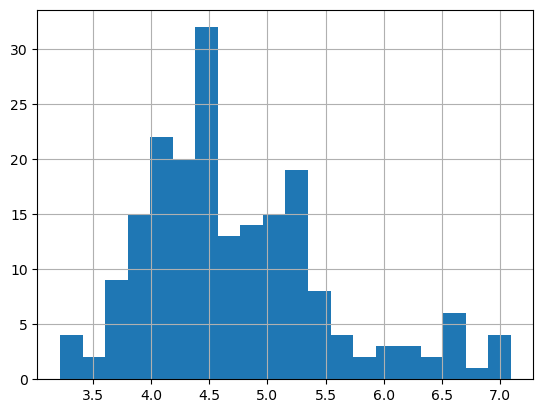

In [286]:
#將年收入,貸款金額 離散數值透過log 轉成常態分布，又名高斯分布
df['年收入_log']=np.log(df['年收入'])
df['年收入_log'].hist(bins=20)

<AxesSubplot:>

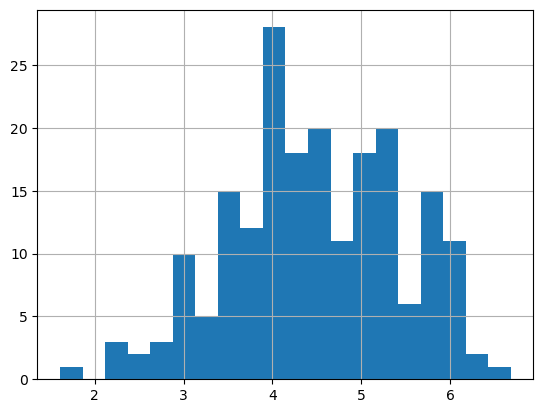

In [287]:
df['貸款金額_log']=np.log(df['貸款金額'])
df['貸款金額_log'].hist(bins=20)

In [288]:
df.head(45)

,客戶ID,年齡,性別,婚姻狀況,教育程度,職業,年收入,貸款金額,還款期限,信用狀態,貸款批准,年收入_log,貸款金額_log
0,1001,35,男,已婚,研究所,醫生,800.0,100.0,1.0,90.0,是,6.684612,4.605170
1,1002,28,女,未婚,大學,受雇職員,50.0,80.0,2.0,75.0,否,3.912023,4.382027
2,1003,42,男,已婚,高中,自營老闆,1200.0,200.0,5.0,80.0,是,7.090077,5.298317
3,1004,30,男,未婚,大學,工程師,60.0,180.0,3.0,85.0,否,4.094345,5.192957
4,1005,50,女,已婚,研究所,教師,100.0,100.0,5.0,95.0,是,4.605170,4.605170
5,1006,25,男,未婚,高中,受雇職員,40.0,140.0,2.0,70.0,否,3.688879,4.941642
6,1007,38,女,已婚,大學,公務員,70.0,100.0,4.0,85.0,是,4.248495,4.605170
7,1008,45,男,已婚,大學,自營老闆,250.0,120.0,3.0,90.0,是,5.521461,4.787492
8,1009,29,女,未婚,研究所,醫生,200.0,390.0,2.0,80.0,否,5.298317,5.966147
9,1010,33,男,已婚,大學,受雇職員,55.0,95.0,2.0,75.0,否,4.007333,4.553877


### B）缺失值處理
### 作法:
###    1.缺失值刪除（dropna）
###      ①刪除例項

###    2.缺失值填充（fillna）


###      ③用眾數填充,可以用未缺失資料的眾數來填充缺失值 


In [289]:
df.isnull().sum()

客戶ID         0
年齡           0
性別           3
婚姻狀況         4
教育程度         7
職業           5
年收入          6
貸款金額         3
還款期限         1
信用狀態        10
貸款批准         6
年收入_log      6
貸款金額_log     3
dtype: int64

In [290]:
# fillna ==>用某一個特定值取代所有 nan
# inplace = True：直接对原始对象資料進行修改；
# inplace = False：不動原資料，修改结果放在新建的資料。
# mode()[0]==>眾數，就是出現频数最高的那个值
df['性別'].fillna(df['性別'].mode()[0],inplace=True)
df['婚姻狀況'].fillna(df['婚姻狀況'].mode()[0],inplace=True)
df['教育程度'].fillna(df['教育程度'].mode()[0],inplace=True)
df['職業'].fillna(df['職業'].mode()[0],inplace=True)
df['年收入'].fillna(df['年收入'].mode()[0],inplace=True)
df['貸款金額'].fillna(df['貸款金額'].mode()[0],inplace=True)
df['還款期限'].fillna(df['還款期限'].mode()[0],inplace=True)
df['信用狀態'].fillna(df['信用狀態'].mode()[0],inplace=True)
df['貸款批准'].fillna(df['貸款批准'].mode()[0],inplace=True)
df['年收入_log'].fillna(df['年收入_log'].mode()[0],inplace=True)
df['貸款金額_log'].fillna(df['貸款金額_log'].mode()[0],inplace=True)

In [291]:
#Checking if any null values is present or not
df.isnull().sum()

客戶ID        0
年齡          0
性別          0
婚姻狀況        0
教育程度        0
職業          0
年收入         0
貸款金額        0
還款期限        0
信用狀態        0
貸款批准        0
年收入_log     0
貸款金額_log    0
dtype: int64

In [292]:
df.columns

Index(['客戶ID', '年齡', '性別', '婚姻狀況', '教育程度', '職業', '年收入', '貸款金額', '還款期限', '信用狀態',
       '貸款批准', '年收入_log', '貸款金額_log'],
      dtype='object')

### C） 選取過濾模型用資料集:選取之後要做成訓練集及測試集的特徵欄位及資料
### 使用 loc函数 or iloc函数

### np.r_是水平連接矩陣欄位
### np.c_是垂直連接矩陣欄位

In [293]:
#預備抓取那些特挣資料欄位 當作 X train data?
np.r_[1:6,8:10,11:13]

array([ 1,  2,  3,  4,  5,  8,  9, 11, 12])

### 抓取特徵欄位及其資料

In [294]:
df.columns

Index(['客戶ID', '年齡', '性別', '婚姻狀況', '教育程度', '職業', '年收入', '貸款金額', '還款期限', '信用狀態',
       '貸款批准', '年收入_log', '貸款金額_log'],
      dtype='object')

In [295]:
x=df.iloc[:,np.r_[1:6,8:10,11:13]].values
print(x[0])

[35 '男' '已婚' '研究所' '醫生' 1.0 90.0 6.684611727667927 4.605170185988092]


In [296]:
y=df.iloc[:,10].values
y

array(['是', '否', '是', '否', '是', '否', '是', '是', '否', '否', '否', '是', '否',
       '是', '否', '是', '是', '是', '否', '是', '是', '否', '是', '是', '否', '是',
       '否', '是', '是', '否', '是', '是', '是', '是', '否', '是', '是', '是', '是',
       '否', '是', '是', '是', '是', '是', '是', '是', '是', '是', '否', '是', '否',
       '否', '是', '是', '否', '是', '否', '是', '是', '是', '否', '是', '否', '是',
       '是', '否', '是', '否', '是', '否', '是', '是', '否', '是', '是', '是', '是',
       '是', '否', '是', '是', '否', '是', '是', '是', '是', '否', '是', '是', '是',
       '是', '否', '是', '是', '否', '是', '是', '否', '是', '否', '是', '是', '是',
       '是', '否', '是', '是', '否', '是', '是', '是', '否', '是', '否', '否', '是',
       '是', '否', '是', '是', '否', '否', '是', '是', '是', '是', '否', '是', '否',
       '是', '是', '否', '否', '是', '是', '是', '否', '是', '是', '否', '否', '是',
       '否', '是', '是', '是', '是', '否', '是', '是', '是', '否', '是', '是', '否',
       '是', '是', '是', '是', '否', '是', '是', '否', '是', '是', '是', '是', '是',
       '是', '是', '是', '是', '否', '是', '是', '否', '是', '是', '否', '否

### D）資料轉換:將類別 (categorical)或是文字(text)的資料轉換成數字
### 做法: Label encoding

### 執行資料轉換:將欄位內類別 (categorical)或是文字(text)的資料轉換成數字

In [297]:
Labelencoder_x=LabelEncoder()
Labelencoder_y=LabelEncoder()

In [298]:
for i in range(0,150):
    print(x[i])

[35 '男' '已婚' '研究所' '醫生' 1.0 90.0 6.684611727667927 4.605170185988092]
[28 '女' '未婚' '大學' '受雇職員' 2.0 75.0 3.912023005428146 4.382026634673881]
[42 '男' '已婚' '高中' '自營老闆' 5.0 80.0 7.090076835776092 5.298317366548036]
[30 '男' '未婚' '大學' '工程師' 3.0 85.0 4.0943445622221 5.19295685089021]
[50 '女' '已婚' '研究所' '教師' 5.0 95.0 4.605170185988092 4.605170185988092]
[25 '男' '未婚' '高中' '受雇職員' 2.0 70.0 3.6888794541139363 4.941642422609304]
[38 '女' '已婚' '大學' '公務員' 4.0 85.0 4.248495242049359 4.605170185988092]
[45 '男' '已婚' '大學' '自營老闆' 3.0 90.0 5.521460917862246 4.787491742782046]
[29 '女' '未婚' '研究所' '醫生' 2.0 80.0 5.298317366548036 5.966146739123692]
[33 '男' '已婚' '大學' '受雇職員' 2.0 75.0 4.007333185232471 4.553876891600541]
[28 '女' '未婚' '大學' '教師' 1.0 70.0 3.912023005428146 4.605170185988092]
[32 '男' '已婚' '大學' '工程師' 2.0 85.0 4.31748811353631 3.912023005428146]
[45 '女' '離婚' '高中' '受雇職員' 1.0 60.0 3.6888794541139363 3.912023005428146]
[39 '男' '已婚' '研究所' '律師' 5.0 95.0 4.787491742782046 5.0106352940962555]
[26 '男' '未婚' '大學

In [299]:
data_1=Labelencoder_x.fit(x[:,1])
data_1.classes_

array(['女', '男'], dtype=object)

In [300]:
data_2=Labelencoder_x.fit(x[:,2])
data_2.classes_

array(['已婚', '未婚', '離婚'], dtype=object)

In [301]:
data_3=Labelencoder_x.fit(x[:,3])
data_3.classes_

array(['大學', '研究所', '高中'], dtype=object)

In [302]:
data_4=Labelencoder_x.fit(x[:,4])
data_4.classes_

array(['公務員', '受雇職員', '工程師', '律師', '教師', '自營老闆', '軍人', '醫生'], dtype=object)

In [303]:
print(x[0])

[35 '男' '已婚' '研究所' '醫生' 1.0 90.0 6.684611727667927 4.605170185988092]


In [304]:
for i in range(1,5):
    x[:,i]=Labelencoder_x.fit_transform(x[:,i])
print(x[0])

[35 1 0 1 7 1.0 90.0 6.684611727667927 4.605170185988092]


In [305]:
print(y)
y=Labelencoder_y.fit_transform(y)
print(y)

['是' '否' '是' '否' '是' '否' '是' '是' '否' '否' '否' '是' '否' '是' '否' '是' '是' '是'
 '否' '是' '是' '否' '是' '是' '否' '是' '否' '是' '是' '否' '是' '是' '是' '是' '否' '是'
 '是' '是' '是' '否' '是' '是' '是' '是' '是' '是' '是' '是' '是' '否' '是' '否' '否' '是'
 '是' '否' '是' '否' '是' '是' '是' '否' '是' '否' '是' '是' '否' '是' '否' '是' '否' '是'
 '是' '否' '是' '是' '是' '是' '是' '否' '是' '是' '否' '是' '是' '是' '是' '否' '是' '是'
 '是' '是' '否' '是' '是' '否' '是' '是' '否' '是' '否' '是' '是' '是' '是' '否' '是' '是'
 '否' '是' '是' '是' '否' '是' '否' '否' '是' '是' '否' '是' '是' '否' '否' '是' '是' '是'
 '是' '否' '是' '否' '是' '是' '否' '否' '是' '是' '是' '否' '是' '是' '否' '否' '是' '否'
 '是' '是' '是' '是' '否' '是' '是' '是' '否' '是' '是' '否' '是' '是' '是' '是' '否' '是'
 '是' '否' '是' '是' '是' '是' '是' '是' '是' '是' '是' '否' '是' '是' '否' '是' '是' '否'
 '否' '是' '是' '是' '是' '是' '是' '是' '是' '否' '是' '是' '否' '是' '是' '否' '否' '是'
 '否' '是' '是' '否' '否' '是']
[1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 0 1 1 0 1 

### E）資料調節與標準化:將特徵值進行調節,將值縮放到一定的範圍,如0~1之間
### 作法1: Standardization 平均&變異數標準化
#### 將所有特徵標準化，也就是高斯分佈。使得數據的平均值為0，變異數(方差)為1。
#### 變異數（英語：variance）又稱方差、變方，描述的是一個隨機變數的離散程度，即一組數字與其平均值之間的距離的度量

## Step5: 執行切割訓練集與測試集

In [306]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


### 執行 Standardization 平均&變異數 資料調節與標準化

In [307]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [308]:
print(X_train[0])

[-0.2681467   0.86757603 -0.70746337 -1.07635277  0.80066701  1.23146301
  1.12574625 -0.473358   -0.23332055]


## Step6: 進行各類sklearn ML模型建模,訓練與測試與模型驗證評估
## A. ML模型建模:
### 1.ML Model: naive_bayes
#### from sklearn.naive_bayes import GaussianNB
### 2.ML Model: K Neighbors Classification
#### from sklearn.neighbors import KNeighborsClassifier
### 3.ML Model: Decision Tree Classification
#### from sklearn.tree import DecisionTreeClassifier
### 4.ML Model: Random Forest Classification
#### from sklearn.ensemble import RandomForestClassifier
## B. 模型驗證評估:
### sklearn.metrics 提供的評估方法:

### 3.confusion_matrix
#### 語法：
#### sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
#### 返回一个混淆矩阵；

### 1.ML Model: naive_bayes

In [309]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [310]:
y_pred=clf.predict(X_test)
print("The naive_bayes accuracy score is ",metrics.accuracy_score(y_test,y_pred))

The naive_bayes accuracy score is  0.24390243902439024


### 2.ML Model: K Neighbors Classification

In [311]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [312]:
y_pred=kn_clf.predict(X_test)
print("Accroding to KneighborsClassifier the accuracy score is",metrics.accuracy_score(y_test,y_pred))

Accroding to KneighborsClassifier the accuracy score is 0.7560975609756098


d:\Users\hgtma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 3.ML Model: Decision Tree Classification

In [313]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [314]:
y_pred=dt_clf.predict(X_test)
print("Accroding to Decison Tree the accuracy is ", metrics.accuracy_score(y_test,y_pred))

Accroding to Decison Tree the accuracy is  0.7560975609756098


### 4.ML Model: Random Forest Classification

In [315]:
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier()
RFclf.fit(X_train,y_train)

RandomForestClassifier()

In [316]:
from sklearn import metrics
print(X_test[0])
y_pred=RFclf.predict(X_test)
print("Accroding to random forest classifier,the accuracy is ",metrics.accuracy_score(y_test,y_pred))
y_pred[0]

[-0.8682432  -0.88465174  0.82760589 -1.05517869 -0.73654686 -1.29548191
 -1.61373278 -1.18105374 -0.33985348]
Accroding to random forest classifier,the accuracy is  0.8536585365853658


0

## Step7 預測

In [317]:
#input new data to predict
#[35 '男' '已婚' '研究所' '醫生' 1.0 90.0 6.684611727667927 4.605170185988092]
#[-0.2681467   0.82257153 -0.70314959 -1.09643329  0.80066701  1.23146301 1.12574625 -0.473358   -0.23332055]
#
import numpy as np
data= np.array([ -0.2681467, 0.82257153, -0.70314959 ,-1.09643329 , 0.80066701 , 1.23146301
  ,1.12574625 ,-0.473358  , -0.23332055]) 
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X_data=ss.fit_transform(data.reshape(-1, 9))
X_data=data
print(X_data)
y_pred=RFclf.predict(X_data.reshape(-1, 9))
print(y_pred)

[-0.2681467   0.82257153 -0.70314959 -1.09643329  0.80066701  1.23146301
  1.12574625 -0.473358   -0.23332055]
[1]


# EXAM2: 請讀取所給之資料集,直接彙整上述步驟相關程式做出最佳之貸款審批預測模型,但 不做資料調整縮小至某區間之動作
## 請用最佳模型預測 下列資料是否同意貸款:
#### [45 ,'男', '未婚', '大學', '工程師', 2.0, 70.0 , 4.184611727667927, 5.605170185988092]

In [318]:
import sklearn
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [319]:
from sklearn.model_selection import train_test_split
#sklearn之LabelEncoder將Label標準化
#LabelEncoder可以將標籤分配一個0—n_classes-1之間的編碼
#將各種標籤分配一個可數的連續編號
from sklearn.preprocessing import LabelEncoder


In [320]:
df=pd.read_csv('loandata_setU.csv')
df.head()

,客戶ID,年齡,性別,婚姻狀況,教育程度,職業,年收入,貸款金額,還款期限,信用狀態,貸款批准
0,1001,35,男,已婚,研究所,醫生,800.0,100.0,1.0,90.0,是
1,1002,28,女,未婚,大學,受雇職員,50.0,80.0,2.0,75.0,否
2,1003,42,男,已婚,高中,自營老闆,1200.0,200.0,5.0,80.0,是
3,1004,30,男,未婚,大學,工程師,60.0,180.0,3.0,85.0,否
4,1005,50,女,已婚,研究所,教師,100.0,100.0,5.0,95.0,是


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   客戶ID    204 non-null    object 
 1   年齡      204 non-null    int64  
 2   性別      201 non-null    object 
 3   婚姻狀況    200 non-null    object 
 4   教育程度    197 non-null    object 
 5   職業      199 non-null    object 
 6   年收入     198 non-null    float64
 7   貸款金額    201 non-null    float64
 8   還款期限    203 non-null    float64
 9   信用狀態    194 non-null    float64
 10  貸款批准    198 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 17.7+ KB


In [322]:
df.describe()

,年齡,年收入,貸款金額,還款期限,信用狀態
count,204.000000,198.000000,201.000000,203.000000,194.000000
mean,37.259804,169.722222,132.666667,3.699507,80.505155
std,8.768852,211.742825,123.627033,1.904489,10.739134
min,22.000000,25.000000,5.000000,1.000000,50.000000
25%,29.000000,65.000000,48.000000,2.000000,72.000000
50%,37.000000,90.000000,90.000000,3.000000,80.000000
75%,44.250000,180.000000,180.000000,5.000000,90.000000
max,55.000000,1200.000000,800.000000,10.000000,100.000000


In [323]:
#觀察一下  職業 欄位的資料
df.職業.value_counts(dropna=False)

受雇職員    58
自營老闆    39
醫生      23
教師      21
工程師     19
公務員     18
律師      14
軍人       7
NaN      5
Name: 職業, dtype: int64

In [324]:
df.columns

Index(['客戶ID', '年齡', '性別', '婚姻狀況', '教育程度', '職業', '年收入', '貸款金額', '還款期限', '信用狀態',
       '貸款批准'],
      dtype='object')

In [325]:
df.isnull().sum()

客戶ID     0
年齡       0
性別       3
婚姻狀況     4
教育程度     7
職業       5
年收入      6
貸款金額     3
還款期限     1
信用狀態    10
貸款批准     6
dtype: int64

In [326]:
#性別 ,教育程度,貸款批准資料轉一致化
df['性別']=df['性別'].str.replace('M','男')
df['性別']=df['性別'].str.replace('F','女')

In [327]:
df['教育程度']=df['教育程度'].str.replace('碩士','研究所')
df['教育程度']=df['教育程度'].str.replace('博士','研究所')

In [328]:
#教育程度,貸款批准資料轉一致化
df['貸款批准']=df['貸款批准'].str.replace('不批准','否')
df['貸款批准']=df['貸款批准'].str.replace('批准','是')

<AxesSubplot:>

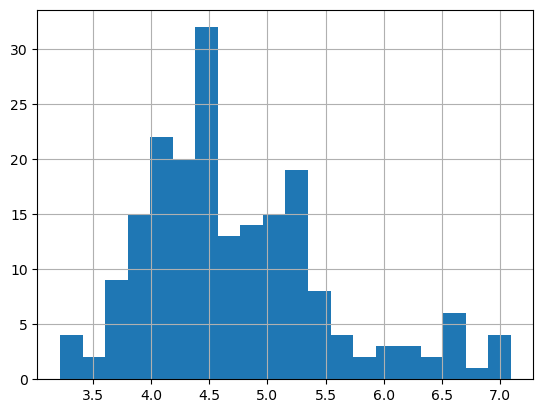

In [329]:
#將年收入,貸款金額 離散數值透過log 轉成常態分布，又名高斯分布
df['年收入_log']=np.log(df['年收入'])
df['年收入_log'].hist(bins=20)

<AxesSubplot:>

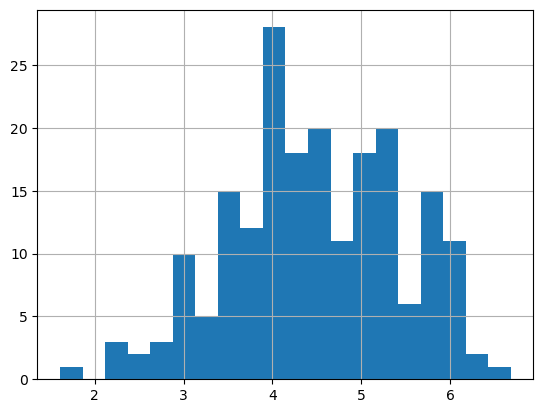

In [330]:
df['貸款金額_log']=np.log(df['貸款金額'])
df['貸款金額_log'].hist(bins=20)

In [331]:
df.head(45)

,客戶ID,年齡,性別,婚姻狀況,教育程度,職業,年收入,貸款金額,還款期限,信用狀態,貸款批准,年收入_log,貸款金額_log
0,1001,35,男,已婚,研究所,醫生,800.0,100.0,1.0,90.0,是,6.684612,4.605170
1,1002,28,女,未婚,大學,受雇職員,50.0,80.0,2.0,75.0,否,3.912023,4.382027
2,1003,42,男,已婚,高中,自營老闆,1200.0,200.0,5.0,80.0,是,7.090077,5.298317
3,1004,30,男,未婚,大學,工程師,60.0,180.0,3.0,85.0,否,4.094345,5.192957
4,1005,50,女,已婚,研究所,教師,100.0,100.0,5.0,95.0,是,4.605170,4.605170
5,1006,25,男,未婚,高中,受雇職員,40.0,140.0,2.0,70.0,否,3.688879,4.941642
6,1007,38,女,已婚,大學,公務員,70.0,100.0,4.0,85.0,是,4.248495,4.605170
7,1008,45,男,已婚,大學,自營老闆,250.0,120.0,3.0,90.0,是,5.521461,4.787492
8,1009,29,女,未婚,研究所,醫生,200.0,390.0,2.0,80.0,否,5.298317,5.966147
9,1010,33,男,已婚,大學,受雇職員,55.0,95.0,2.0,75.0,否,4.007333,4.553877


In [332]:
df.isnull().sum()

客戶ID         0
年齡           0
性別           3
婚姻狀況         4
教育程度         7
職業           5
年收入          6
貸款金額         3
還款期限         1
信用狀態        10
貸款批准         6
年收入_log      6
貸款金額_log     3
dtype: int64

In [333]:
# fillna ==>用某一個特定值取代所有 nan
# inplace = True：直接对原始对象資料進行修改；
# inplace = False：不動原資料，修改结果放在新建的資料。
# mode()[0]==>眾數，就是出現频数最高的那个值
df['性別'].fillna(df['性別'].mode()[0],inplace=True)
df['婚姻狀況'].fillna(df['婚姻狀況'].mode()[0],inplace=True)
df['教育程度'].fillna(df['教育程度'].mode()[0],inplace=True)
df['職業'].fillna(df['職業'].mode()[0],inplace=True)
df['年收入'].fillna(df['年收入'].mode()[0],inplace=True)
df['貸款金額'].fillna(df['貸款金額'].mode()[0],inplace=True)
df['還款期限'].fillna(df['還款期限'].mode()[0],inplace=True)
df['信用狀態'].fillna(df['信用狀態'].mode()[0],inplace=True)
df['貸款批准'].fillna(df['貸款批准'].mode()[0],inplace=True)
df['年收入_log'].fillna(df['年收入_log'].mode()[0],inplace=True)
df['貸款金額_log'].fillna(df['貸款金額_log'].mode()[0],inplace=True)

In [334]:
#Checking if any null values is present or not
df.isnull().sum()

客戶ID        0
年齡          0
性別          0
婚姻狀況        0
教育程度        0
職業          0
年收入         0
貸款金額        0
還款期限        0
信用狀態        0
貸款批准        0
年收入_log     0
貸款金額_log    0
dtype: int64

In [335]:
df.columns

Index(['客戶ID', '年齡', '性別', '婚姻狀況', '教育程度', '職業', '年收入', '貸款金額', '還款期限', '信用狀態',
       '貸款批准', '年收入_log', '貸款金額_log'],
      dtype='object')

In [336]:
df.columns

Index(['客戶ID', '年齡', '性別', '婚姻狀況', '教育程度', '職業', '年收入', '貸款金額', '還款期限', '信用狀態',
       '貸款批准', '年收入_log', '貸款金額_log'],
      dtype='object')

In [337]:
x=df.iloc[:,np.r_[1:6,8:10,11:13]].values
print(x[0])

[35 '男' '已婚' '研究所' '醫生' 1.0 90.0 6.684611727667927 4.605170185988092]


In [338]:
y=df.iloc[:,10].values
y

array(['是', '否', '是', '否', '是', '否', '是', '是', '否', '否', '否', '是', '否',
       '是', '否', '是', '是', '是', '否', '是', '是', '否', '是', '是', '否', '是',
       '否', '是', '是', '否', '是', '是', '是', '是', '否', '是', '是', '是', '是',
       '否', '是', '是', '是', '是', '是', '是', '是', '是', '是', '否', '是', '否',
       '否', '是', '是', '否', '是', '否', '是', '是', '是', '否', '是', '否', '是',
       '是', '否', '是', '否', '是', '否', '是', '是', '否', '是', '是', '是', '是',
       '是', '否', '是', '是', '否', '是', '是', '是', '是', '否', '是', '是', '是',
       '是', '否', '是', '是', '否', '是', '是', '否', '是', '否', '是', '是', '是',
       '是', '否', '是', '是', '否', '是', '是', '是', '否', '是', '否', '否', '是',
       '是', '否', '是', '是', '否', '否', '是', '是', '是', '是', '否', '是', '否',
       '是', '是', '否', '否', '是', '是', '是', '否', '是', '是', '否', '否', '是',
       '否', '是', '是', '是', '是', '否', '是', '是', '是', '否', '是', '是', '否',
       '是', '是', '是', '是', '否', '是', '是', '否', '是', '是', '是', '是', '是',
       '是', '是', '是', '是', '否', '是', '是', '否', '是', '是', '否', '否

In [339]:
Labelencoder_x=LabelEncoder()
Labelencoder_y=LabelEncoder()

In [340]:
print(x[0])

[35 '男' '已婚' '研究所' '醫生' 1.0 90.0 6.684611727667927 4.605170185988092]


In [341]:
for i in range(1,5):
    x[:,i]=Labelencoder_x.fit_transform(x[:,i])
print(x[0])

[35 1 0 1 7 1.0 90.0 6.684611727667927 4.605170185988092]


In [342]:
print(y)
y=Labelencoder_y.fit_transform(y)
print(y)

['是' '否' '是' '否' '是' '否' '是' '是' '否' '否' '否' '是' '否' '是' '否' '是' '是' '是'
 '否' '是' '是' '否' '是' '是' '否' '是' '否' '是' '是' '否' '是' '是' '是' '是' '否' '是'
 '是' '是' '是' '否' '是' '是' '是' '是' '是' '是' '是' '是' '是' '否' '是' '否' '否' '是'
 '是' '否' '是' '否' '是' '是' '是' '否' '是' '否' '是' '是' '否' '是' '否' '是' '否' '是'
 '是' '否' '是' '是' '是' '是' '是' '否' '是' '是' '否' '是' '是' '是' '是' '否' '是' '是'
 '是' '是' '否' '是' '是' '否' '是' '是' '否' '是' '否' '是' '是' '是' '是' '否' '是' '是'
 '否' '是' '是' '是' '否' '是' '否' '否' '是' '是' '否' '是' '是' '否' '否' '是' '是' '是'
 '是' '否' '是' '否' '是' '是' '否' '否' '是' '是' '是' '否' '是' '是' '否' '否' '是' '否'
 '是' '是' '是' '是' '否' '是' '是' '是' '否' '是' '是' '否' '是' '是' '是' '是' '否' '是'
 '是' '否' '是' '是' '是' '是' '是' '是' '是' '是' '是' '否' '是' '是' '否' '是' '是' '否'
 '否' '是' '是' '是' '是' '是' '是' '是' '是' '否' '是' '是' '否' '是' '是' '否' '否' '是'
 '否' '是' '是' '否' '否' '是']
[1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 0 1 1 0 1 

In [343]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [344]:
print(X_train[0])

[35 1 0 0 5 6.0 92.0 4.382026634673881 4.248495242049359]


### 1.ML Model: naive_bayes

In [345]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [346]:
y_pred=clf.predict(X_test)
print("The naive_bayes accuracy score is ",metrics.accuracy_score(y_test,y_pred))

The naive_bayes accuracy score is  0.8536585365853658


### 2.ML Model: K Neighbors Classification

In [347]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [348]:
y_pred=kn_clf.predict(X_test)
print("Accroding to KneighborsClassifier the accuracy score is",metrics.accuracy_score(y_test,y_pred))

Accroding to KneighborsClassifier the accuracy score is 0.8048780487804879


d:\Users\hgtma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 3.ML Model: Decision Tree Classification

In [349]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [350]:
y_pred=dt_clf.predict(X_test)
print("Accroding to Decison Tree the accuracy is ", metrics.accuracy_score(y_test,y_pred))

Accroding to Decison Tree the accuracy is  0.6585365853658537


### 4.ML Model: Random Forest Classification

In [351]:
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier()
RFclf.fit(X_train,y_train)

RandomForestClassifier()

In [352]:
from sklearn import metrics
print(X_test[0])
y_pred=RFclf.predict(X_test)
print("Accroding to random forest classifier,the accuracy is ",metrics.accuracy_score(y_test,y_pred))
y_pred[0]

[29 0 1 0 1 1.0 65.0 3.6888794541139363 4.0943445622221]
Accroding to random forest classifier,the accuracy is  0.7804878048780488


0

## Step7 預測

In [354]:
#input new data to predict
#[35 '男' '已婚' '研究所' '醫生' 1.0 90.0 6.684611727667927 4.605170185988092]
#[-0.2681467   0.82257153 -0.70314959 -1.09643329  0.80066701  1.23146301 1.12574625 -0.473358   -0.23332055]
#[45 ,'男', '未婚', '大學', '工程師', 2.0, 70.0 , 4.184611727667927, 5.605170185988092]
import numpy as np
data= np.array([ 45 ,1, 1, 0, 2, 2.0, 70.0 , 4.184611727667927, 5.605170185988092]) 
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X_data=ss.fit_transform(data.reshape(-1, 9))
X_data=data
print(X_data)
y_pred=RFclf.predict(X_data.reshape(-1, 9))
print(y_pred)

[45.          1.          1.          0.          2.          2.
 70.          4.18461173  5.60517019]
[0]
